In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as s
import random

Read in Instagram Post Engagement Data

In [4]:
df_engagement = pd.read_csv('Instagram Post Engagement.csv')
#remove RowHash column
df_engagement.drop('RowHash', axis=1, inplace=True)
#check for missing values
df_engagement.isna().sum(axis=0)

Date                  0
Media ID              0
Media caption         0
Media product type    0
Media impressions     0
Media reach           0
Like count            0
Comments count        0
Shares                0
Unique saves          0
Video views           0
dtype: int64

Scater plot likes comment sharees

In [5]:
df_engagement.shape

(61, 11)

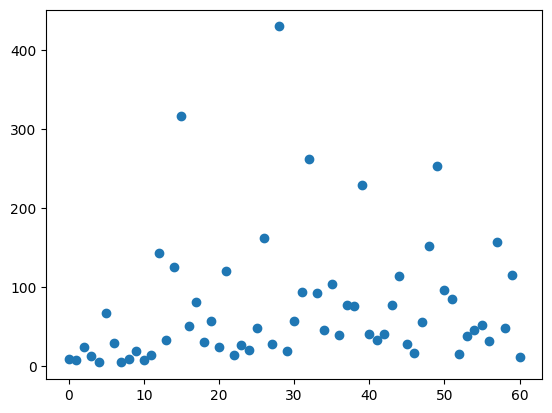

In [6]:
plt.scatter([x for x in range(61)],  df_engagement['Like count'])

Text(0.5, 1.0, 'Distribution of Likes Instagram posts')

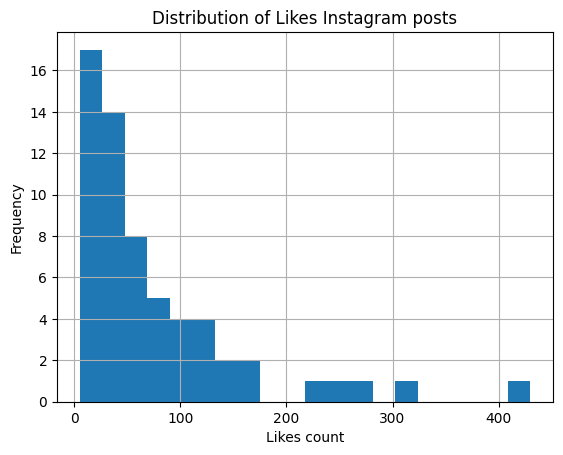

In [7]:
# draw a histogram of the likes column to better undertsnd data
df_engagement['Like count'].hist(bins=20)
# add labels and title
plt.xlabel('Likes count')
plt.ylabel('Frequency')
plt.title('Distribution of Likes Instagram posts')

Based on above plots data follows normal distribution with few outliers 
Repeat same for share and and cooment.
I will use combine value of this data to indentify top-performing post

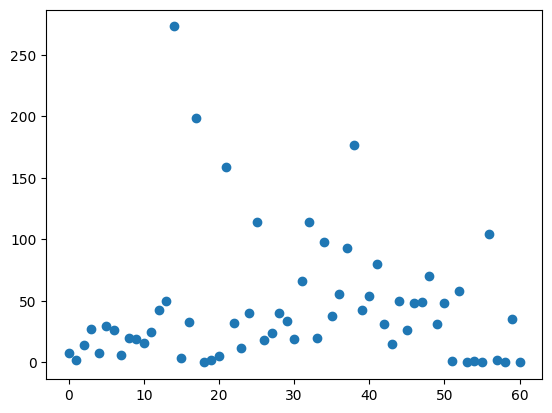

In [8]:
plt.scatter([x for x in range(61)],  df_engagement['Comments count'])

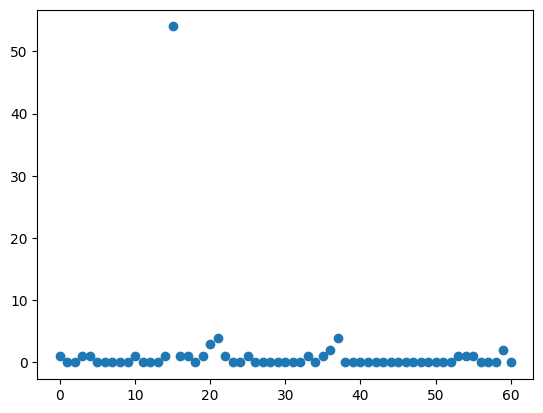

In [9]:
plt.scatter([x for x in range(61)],  df_engagement['Shares'])

Removing outliers

In [10]:
df_engagement = df_engagement.drop(
    df_engagement[
    (df_engagement['Shares'] > 10) |
    (df_engagement['Comments count'] > 150) |
    (df_engagement['Like count'] > 300)
].index)   
df_engagement.shape 

(55, 11)

Sum all likes comments and shares 

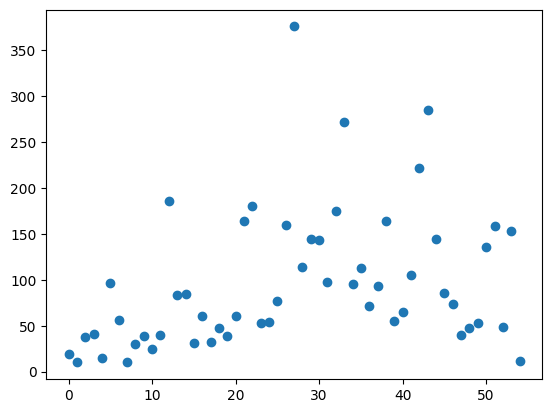

In [11]:
df_engagement['like+com+share'] = \
df_engagement['Shares'] + df_engagement['Like count'] + df_engagement['Comments count']
plt.scatter([x for x in range(len(df_engagement.index))],  df_engagement['like+com+share'])

line chart showing post engagement trends over time.

<Axes: xlabel='Date'>

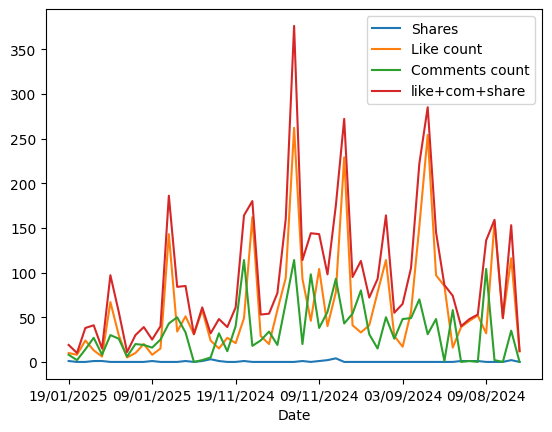

In [12]:
df_engagement.plot(x='Date',  y= ['Shares', 'Like count','Comments count', 'like+com+share'])

Print 5 most performing posts

In [13]:
def most_performing_posts(num: int, posts: list):
    return posts[:num]

In [14]:
posts = df_engagement.sort_values(by='like+com+share', ascending=False)['Media caption'].values
print(*most_performing_posts(num=5, posts=posts))

When I was a kid and my parents got divorced, I witnessed my Mum transformed... She became dedicated to self-care, self-development and healing herself... I watched her get a job, find herself, meet her own needs and thrive as a parent and human... There were definitely hard times, lots of tears and I was hurting over my parents divorce... But one of the best gifts my parents divorce gave me, was seeing my mum thrive into the person she is today, and teach me about self-care, self-love, boundaries and what healthy relationship looks like. I am running a free masterclass to teach you how to ensure this is your story. 
Comment 'Class' and I will DM you a link. 
From a therapist and fellow separated mum, you've got this!

 #mumanxiety #mumguilt #mumguiltisreal #singlemums #singlemumuk #singlemumlife #solomums #singlemomlife #singlemoms #singlemother #singleparents 8 reminders you need to hear today as a divorced mum:
1. Life is too short to let loneliness drive you back to toxic people
2.

Plot a bar chart comparing different post types (Reels vs. Static Posts)

<Axes: xlabel='Media product type'>

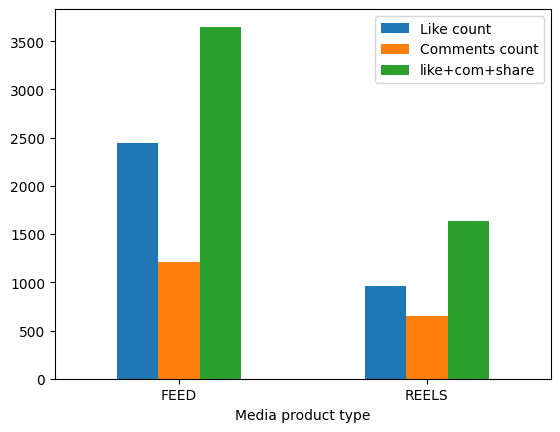

In [15]:
df_REELS = df_engagement.groupby(by='Media product type').sum()
df_REELS.plot(
    y = ['Like count','Comments count', 'like+com+share'],
    kind='bar',
    rot=0,
)

CALCULATING AVERAGE ENGAGEMENT RATE

average engagement rate = (Total engagement / total followers) * 100

In [16]:
def average_engagement(engagement, followers):
    return (engagement / followers) * 100
engagement = df_engagement['like+com+share'].sum()

Reading in instagram_owerwiev data

In [17]:
df = pd.read_csv('instagram_overwiev.csv')
df.drop('RowHash', axis=1, inplace=True)
print('Num of data points: ', data_points := len(df.index))
print()
print(ser := df.isna().sum(axis=0))
print()
for name in df.columns:
    if ser[name] > 0:
        print(f'Column \'{name}\' is missing {ser[name]} values out of total {data_points}')


Num of data points:  379

Date                     0
Profile impressions      0
Shares                   0
Engagement               0
Profile visits           0
Profile reach            0
Reel shares              0
New followers          340
dtype: int64

Column 'New followers' is missing 340 values out of total 379


Investigating 'New followers'

In [18]:
new_folowers_gained = df['New followers'].sum()
# when new folowers are gained
numb_dates_new_folowers = len(df[(df['New followers'] != 0.) & df['New followers'].notna()].index) 
zero_folowers_days = len(df[df['New followers'].eq(0)].index)
print(f'Total New folowers: {new_folowers_gained}, \nwas gained in {numb_dates_new_folowers} days, on {zero_folowers_days} days we gained no followers ')

Total New folowers: 194.0, 
was gained in 36 days, on 3 days we gained no followers 


In [19]:
sigma = np.std(df['New followers'])
mu = np.mean(df['New followers'])
print(f'Standard deviation New Followers = {sigma}, mean = {mu}')

Standard deviation New Followers = 3.689813972707661, mean = 4.9743589743589745


Text(0.5, 1.0, 'Distribution of Folowers')

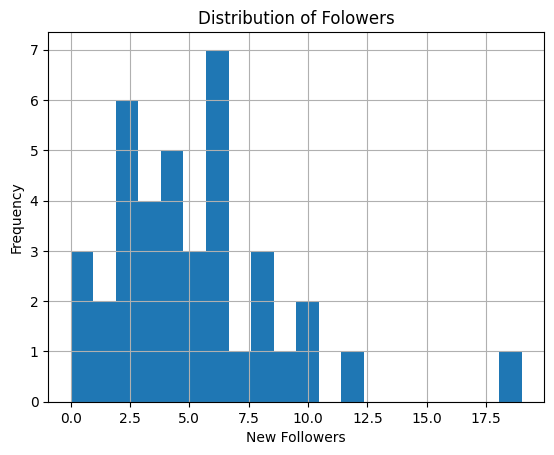

In [20]:
# draw a histogram of the New followers column to better undertsnd data
df['New followers'].hist(bins=20)

# add labels and title
plt.xlabel('New Followers')
plt.ylabel('Frequency')
plt.title('Distribution of Folowers')

As the data set has a total 379 data points, removing 340 rows (NaN in 'New followers') would result in a significant loss of information across the dataset.
I will also need New followers information to further calculate Engagement rate so I can not drop New Followers column. 
After plotting histogram I can tell that data distribution is close to normal distribution, with some outliers.
Therefore I decided to fill missing values in New Followers with randomly sampling data from normal distribution with mean and standard deviation calculated from existing data points.

In [21]:
#calculating mean and std from New followers existing data
n = s.NormalDist(mu=mu, sigma=sigma)
normal_dist_samples = n.samples(100000, seed=42)
random_samples = random.choices(normal_dist_samples, k=data_points)
random_samples = [int(x) if x > 0 else int(mu) for x in random_samples]
df1 = pd.DataFrame(random_samples, columns=['New followers'])
df.fillna(df1, inplace=True)
print(df1.tail(5))
print('should be same sa:')
print(df['New followers'].tail(5))


     New followers
374              8
375              0
376             11
377              3
378              4
should be same sa:
374     8.0
375     0.0
376    11.0
377     3.0
378     4.0
Name: New followers, dtype: float64


Visualise distribution of New followers with scatter plot
Handling missing values in this way, opposite to filling NaN with mean value, I am adding a certain level of randomness in data, still making sure that data reflect average 
numbers of followers gained in the first 40 days.

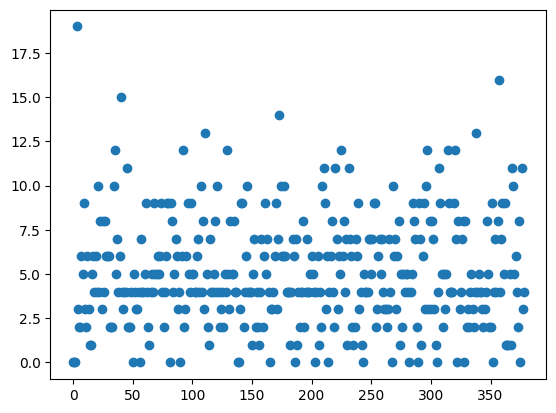

In [22]:
plt.scatter([i for i in range(data_points)],  df['New followers'])

In [23]:
#given engagement and followers calculate engagement rate
def average_engagement(engagement, followers):
    return engagement / followers * 100
#this will be total number of followers gained in time period from
followers = df['New followers'].sum()

In [24]:
#calculate daily average engagement rate adn add it to data 
df_engagement['engagement_rate'] = average_engagement(
    df_engagement['like+com+share'],
    followers
)
df_engagement[['Date', 'engagement_rate']].head(5)

,Date,engagement_rate
0,19/01/2025,0.992685
1,18/01/2025,0.522466
2,17/01/2025,1.985371
3,16/01/2025,2.142111
4,15/01/2025,0.783699


In [25]:
#calcualte mean engagement rate acors whole data set
df_engagement['engagement_rate'].mean()

np.float64(5.017573857699251)

In [26]:
df_engagement.head(5)

,Date,Media ID,Media caption,Media product type,Media impressions,Media reach,Like count,Comments count,Shares,Unique saves,Video views,like+com+share,engagement_rate
0,19/01/2025,1.790220e+16,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,19,0.992685
1,18/01/2025,1.807121e+16,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,741,695,8,2,0,1,0,10,0.522466
2,17/01/2025,1.802762e+16,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,1821,1666,24,14,0,13,0,38,1.985371
3,16/01/2025,1.803459e+16,Comment ‘CLASS’ to sign up to my free mastercl...,REELS,0,1280,13,27,1,5,0,41,2.142111
4,15/01/2025,1.801221e+16,Comment ‘CLASS’ to sign up to my free mastercl...,REELS,0,753,6,8,1,2,0,15,0.783699


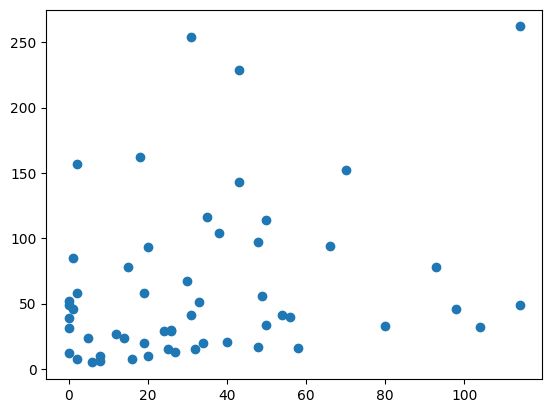

In [27]:
plt.scatter(df_engagement['Comments count'],  df_engagement['Like count'])